### Project: Regression - Week 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape, df.columns

((10886, 12),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'))

### Create time-related features

### Extract features like hour, month etc. from the datetime column.

In [4]:
def create_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month_name()
    df['day'] = df['datetime'].dt.day_name()
    df['hour'] = df['datetime'].dt.hour
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day_of_week'] = df['datetime'].dt.weekday
create_datetime(df)

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,Saturday,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,Saturday,1,52,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,Saturday,2,52,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,Saturday,3,52,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,Saturday,4,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,Wednesday,19,51,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,Wednesday,20,51,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,Wednesday,21,51,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,Wednesday,22,51,2


In [6]:
X = df.drop(['casual', 'registered', 'count'], axis=1)
y = df[['count']]

In [7]:
# The function train_test_split() randomly separate the data. If you want controll the randomness you set the random_state to a value
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.20, random_state=60)

In [8]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((8708, 15), (2178, 15), (8708, 1), (2178, 1))

In [9]:
df_train = pd.concat([Xtrain, ytrain], axis=1)
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
2308,2011-06-04 02:00:00,2,0,0,1,22.14,25.760,56,12.9980,2011,June,Saturday,2,22,5,59
3052,2011-07-16 02:00:00,3,0,0,1,24.60,29.545,73,8.9981,2011,July,Saturday,2,28,5,58
1984,2011-05-09 14:00:00,2,0,1,1,25.42,31.060,41,15.0013,2011,May,Monday,14,19,0,162
7483,2012-05-11 04:00:00,2,0,1,1,17.22,21.210,50,12.9980,2012,May,Friday,4,19,4,9
4047,2011-09-19 16:00:00,3,0,1,2,24.60,30.305,60,11.0014,2011,September,Monday,16,38,0,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,2012-11-16 05:00:00,4,0,1,2,12.30,15.910,65,6.0032,2012,November,Friday,5,46,4,36
6543,2012-03-09 21:00:00,1,0,1,1,14.76,16.665,34,22.0028,2012,March,Friday,21,10,4,141
1418,2011-04-04 23:00:00,2,0,1,2,26.24,31.060,47,15.0013,2011,April,Monday,23,14,0,48
3137,2011-07-19 15:00:00,3,0,1,1,36.08,40.910,44,12.9980,2011,July,Tuesday,15,29,1,158


In [10]:
df_val = pd.concat([Xval, yval], axis=1)
df_val

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
218,2011-01-10 09:00:00,1,0,1,2,5.74,6.060,50,16.9979,2011,January,Monday,9,2,0,94
6548,2012-03-10 02:00:00,1,0,0,1,10.66,12.120,41,16.9979,2012,March,Saturday,2,10,5,42
6597,2012-03-12 04:00:00,1,0,1,1,13.94,16.665,61,12.9980,2012,March,Monday,4,11,0,3
8026,2012-06-14 19:00:00,2,0,1,1,28.70,32.575,48,16.9979,2012,June,Thursday,19,24,3,579
8937,2012-08-14 18:00:00,3,0,1,1,31.16,35.605,62,19.0012,2012,August,Tuesday,18,33,1,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,2012-03-15 19:00:00,1,0,1,2,26.24,31.060,50,12.9980,2012,March,Thursday,19,11,3,425
10437,2012-12-01 07:00:00,4,0,0,2,9.84,12.120,87,8.9981,2012,December,Saturday,7,48,5,63
8768,2012-08-07 17:00:00,3,0,1,2,31.98,37.120,62,8.9981,2012,August,Tuesday,17,32,1,868
5827,2012-01-18 00:00:00,1,0,1,2,18.86,22.725,77,22.0028,2012,January,Wednesday,0,3,2,17


Features classification:
* Season - categorical - ohe
* holiday - categorical - ohe
* workingday - categorical - ohe
* Weather - categorical - ohe
* temp and atemp numerical - scaling or binning
* humidity - numerical - scaling or binning
* windspeed - numerical - scaling or binning
* Month - categorical - ohe
* Weekdays - categorical - ohe
* Hour - numerical - scaling or binning

### Linear Regression model - without Feauture Engineering

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# input feature
X_train_new = df_train[['season', 'weather', 'atemp', 'humidity', 'hour', 'holiday', 'workingday', 'year']]  # to select the input features [[]] -> dataframe, matrix

# target variable
y_train_new = df_train['count'] # to select the target (dependent) variable [] > Series, array

In [13]:
# input feature
X_val_new = df_val[['season', 'weather', 'atemp', 'humidity', 'hour', 'holiday', 'workingday', 'year']]  # to select the input features [[]] -> dataframe, matrix

# target variable
y_val_new = df_val['count'] # to select the target (dependent) variable [] > Series, array

In [14]:
# instantiate the model 
m_lr = LinearRegression() # build the model

# fit the model (train the model)
m_lr.fit(X_train_new, y_train_new) 

LinearRegression()

In [15]:
X_train_new.shape, y_train_new.shape, X_val_new.shape, y_val_new.shape

((8708, 8), (8708,), (2178, 8), (2178,))

In [16]:
ypred=m_lr.predict(X_val_new)
ypred

array([ 11.61125154,  98.58725432, 100.70338974, ..., 367.18855231,
        69.26358396, 250.71247355])

In [17]:
ypred[ypred<0] = 0
ypred

array([ 11.61125154,  98.58725432, 100.70338974, ..., 367.18855231,
        69.26358396, 250.71247355])

In [18]:
ypred.shape

(2178,)

### Predicted values vs the true value

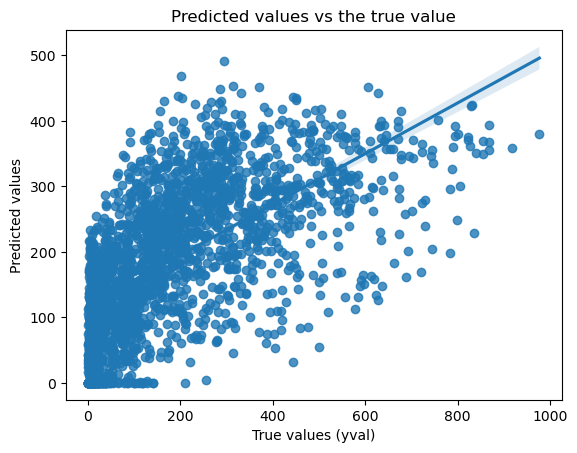

In [19]:
sns.regplot(x=y_val_new, y=ypred)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('Predicted values vs the true value');

In [20]:
m_lr.score(X_train_new, y_train_new)

0.384580686598055

In [21]:
print("Coefficients:", m_lr.coef_)
print("Intercept   :", m_lr.intercept_)

Coefficients: [ 22.04161907  -4.08019602   6.22049979  -2.11678638   7.79681412
 -12.75990704   0.58606317  81.31226261]
Intercept   : -163523.84438808818


In [22]:
m_lr.score(X_val_new, y_val_new)

0.3928697075439088

In [23]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_val_new, ypred))

1.3143023417283413

### Feature Expansion Strategies

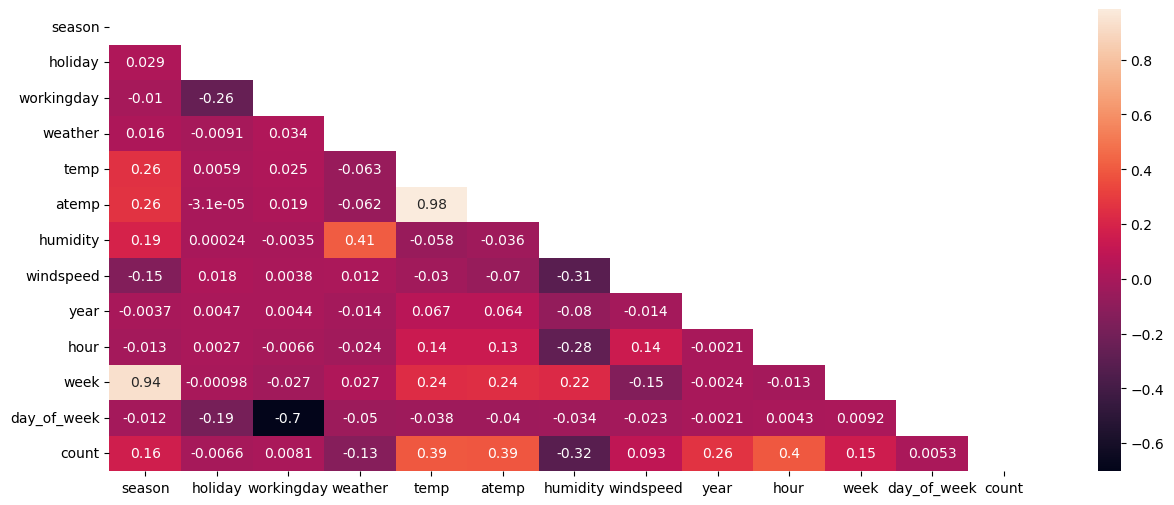

In [24]:
df_corr = df_train.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_corr, mask=mask, annot=True, ax=ax);

In [25]:
Xtrain_fe = Xtrain[['season', 'weather', 'hour', 'humidity','temp', 'year', 'month', 'day', 'workingday', 'holiday', 'day_of_week', 'week', 'windspeed']]
Xtrain_fe 

,season,weather,hour,humidity,temp,year,month,day,workingday,holiday,day_of_week,week,windspeed
2308,2,1,2,56,22.14,2011,June,Saturday,0,0,5,22,12.9980
3052,3,1,2,73,24.60,2011,July,Saturday,0,0,5,28,8.9981
1984,2,1,14,41,25.42,2011,May,Monday,1,0,0,19,15.0013
7483,2,1,4,50,17.22,2012,May,Friday,1,0,4,19,12.9980
4047,3,2,16,60,24.60,2011,September,Monday,1,0,0,38,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,4,2,5,65,12.30,2012,November,Friday,1,0,4,46,6.0032
6543,1,1,21,34,14.76,2012,March,Friday,1,0,4,10,22.0028
1418,2,2,23,47,26.24,2011,April,Monday,1,0,0,14,15.0013
3137,3,1,15,44,36.08,2011,July,Tuesday,1,0,1,29,12.9980


In [26]:
scaling_and_poly = make_pipeline(MinMaxScaler(),
                                 PolynomialFeatures(include_bias=False, interaction_only=False, degree=2))                                                                

In [27]:
ohe_and_poly = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'),
                                 PolynomialFeatures(include_bias=False, interaction_only=False, degree=2))        

In [28]:
trans = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['season', 'weather',
                                                                      'year', 'day', 'month', 'day_of_week', 'week']),
    ('scaling_polynomial', scaling_and_poly, ['humidity', 'temp']),
    ("do-nothing", "passthrough", ['holiday', 'workingday']),
    ('binning',  KBinsDiscretizer(encode='onehot-dense'), ['windspeed']),
    ('ohe_and_poly', ohe_and_poly, ['hour'])

])

In [29]:
trans

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['season', 'weather', 'year', 'day', 'month',
                                  'day_of_week', 'week']),
                                ('scaling_polynomial',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['humidity', 'temp']),
                                ('do-nothing', 'passthrough',
                                 ['holiday', 'workingday']),
                                ('binning',
                                 KBinsDiscretizer(encode='onehot-dense'),
                                 ['windspeed']),
                                ('ohe_and_poly',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['hour'])])

In [30]:
# fit the column transformer on the training data
trans.fit(Xtrain_fe)
# transform the training data
Xtrain_new_tran = trans.transform(Xtrain_fe)
pd.DataFrame(Xtrain_new_tran, columns=trans.get_feature_names_out())

,onehot__season_1,onehot__season_2,onehot__season_3,onehot__season_4,onehot__weather_1,onehot__weather_2,onehot__weather_3,onehot__year_2011,onehot__year_2012,onehot__day_Friday,...,ohe_and_poly__hour_20^2,ohe_and_poly__hour_20 hour_21,ohe_and_poly__hour_20 hour_22,ohe_and_poly__hour_20 hour_23,ohe_and_poly__hour_21^2,ohe_and_poly__hour_21 hour_22,ohe_and_poly__hour_21 hour_23,ohe_and_poly__hour_22^2,ohe_and_poly__hour_22 hour_23,ohe_and_poly__hour_23^2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8704,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8705,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8706,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# transform the test data
Xval_tran = trans.transform(Xval)
pd.DataFrame(Xval_tran, columns=trans.get_feature_names_out())

,onehot__season_1,onehot__season_2,onehot__season_3,onehot__season_4,onehot__weather_1,onehot__weather_2,onehot__weather_3,onehot__year_2011,onehot__year_2012,onehot__day_Friday,...,ohe_and_poly__hour_20^2,ohe_and_poly__hour_20 hour_21,ohe_and_poly__hour_20 hour_22,ohe_and_poly__hour_20 hour_23,ohe_and_poly__hour_21^2,ohe_and_poly__hour_21 hour_22,ohe_and_poly__hour_21 hour_23,ohe_and_poly__hour_22^2,ohe_and_poly__hour_22 hour_23,ohe_and_poly__hour_23^2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2175,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear regression model on the transformed data

In [32]:
# initialize the model 
m_lr_tran = LinearRegression()

# fit the model on the transformed training data
m_lr_tran.fit(Xtrain_new_tran, y_train_new)

LinearRegression()

In [33]:
ypred_tran=m_lr_tran.predict(Xval_tran)
ypred_tran

array([ 53.  ,  41.5 ,  42.  , ..., 528.  ,  22.25, 307.  ])

In [34]:
ypred_tran[ypred_tran<0] = 0
ypred_tran

array([ 53.  ,  41.5 ,  42.  , ..., 528.  ,  22.25, 307.  ])

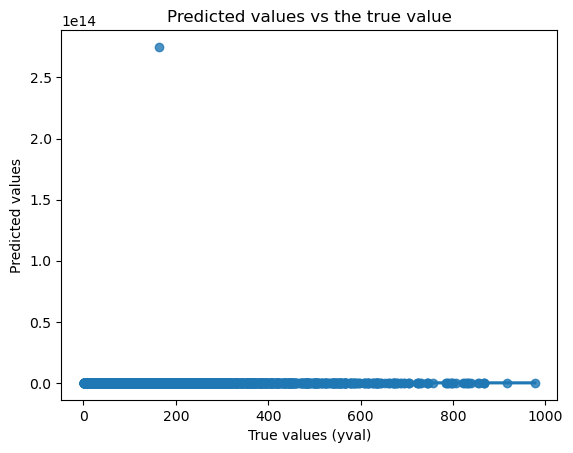

In [35]:
sns.regplot(x=y_val_new, y=ypred_tran)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('Predicted values vs the true value');

In [36]:
y_train_new.shape, ypred_tran.shape

((8708,), (2178,))

In [37]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_val_new, ypred_tran))

1.267956428123567

### Transform the target column

In [38]:
y_train_log = np.log1p(y_train_new)

### Training the model using ylog

In [39]:
# initialize the model 
m_lr_tran_log = LinearRegression()

# fit the model on the transformed training data
m_lr_tran_log.fit(Xtrain_new_tran, y_train_log)

LinearRegression()

In [40]:
ypred_train_log=m_lr_tran_log.predict(Xtrain_new_tran)
ypred_train_log

array([2.9296875, 2.9609375, 5.265625 , ..., 4.15625  , 5.328125 ,
       5.421875 ])

In [41]:
np.sum(ypred_train_log <0)

0

In [42]:
ypred_train_unlog = np.expm1(ypred_train_log)

In [43]:
print(f'The R2 score for the Linear Regression using ylog for the train data is {round((r2_score(y_train_new, ypred_train_unlog)),4)}')

print(f'The MSLE for the Linear Regression model using ylog for the train data is {round((mean_squared_log_error(y_train_new, ypred_train_unlog, squared = False)), 4)}')

The R2 score for the Linear Regression using ylog for the train data is 0.7381
The MSLE for the Linear Regression model using ylog for the train data is 0.5661


* log transformation for validation data

In [44]:
ypred_val_log=m_lr_tran_log.predict(Xval_tran)
ypred_val_log

array([4.0859375, 2.515625 , 1.90625  , ..., 6.4765625, 3.625    ,
       5.453125 ])

In [45]:
np.sum(ypred_val_log <0)

0

In [46]:
ypred_val_unlog = pd.Series(np.expm1(ypred_val_log))
ypred_val_unlog[ypred_val_unlog >1000]=232
np.sum(ypred_val_unlog>1000)

0

In [47]:
print(f'The R2 score for the Linear Regression using ylog for the val data is {round((r2_score(y_val_new, ypred_val_unlog)),4)}')

print(f'The MSLE for the Linear Regression model using ylog for the val data is {round((mean_squared_log_error(y_val_new, ypred_val_unlog, squared = False)), 4)}')

The R2 score for the Linear Regression using ylog for the val data is 0.7261
The MSLE for the Linear Regression model using ylog for the val data is 0.5949


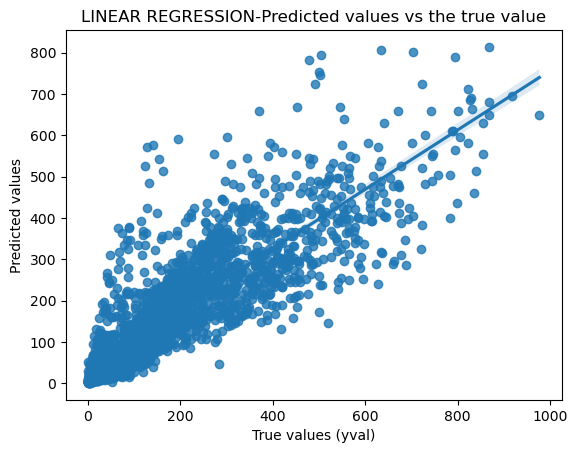

In [48]:
sns.regplot(x=y_val_new, y=ypred_val_unlog)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('LINEAR REGRESSION-Predicted values vs the true value');

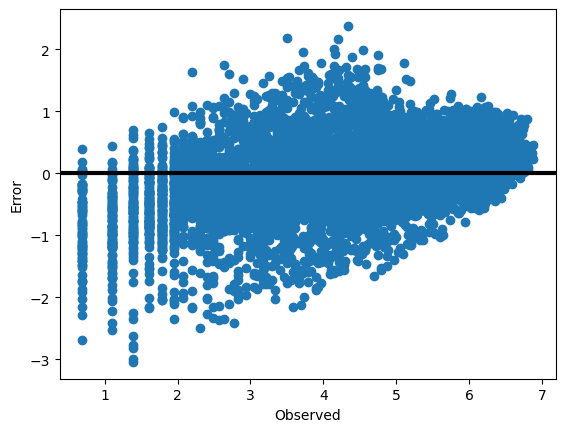

In [49]:
# plot the error difference
error = y_train_log - ypred_train_log
fig, ax = plt.subplots()
ax.scatter(y_train_log, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

###  Poisson Regression

In [50]:
from sklearn.linear_model import PoissonRegressor

mp = PoissonRegressor(alpha=1)
mp.fit(Xtrain_new_tran, y_train_new)

PoissonRegressor(alpha=1)

In [51]:
ypred_p=mp.predict(Xval_tran)
ypred_p

array([ 77.20028721,  36.59128771,  28.62505623, ..., 655.33018666,
        44.36949799, 274.21300291])

In [52]:
ypred_p_train=mp.predict(Xtrain_new_tran)
ypred_p_train

array([ 40.1219017 ,  36.97873434, 218.08064212, ...,  82.90986454,
       241.50555127, 282.66845573])

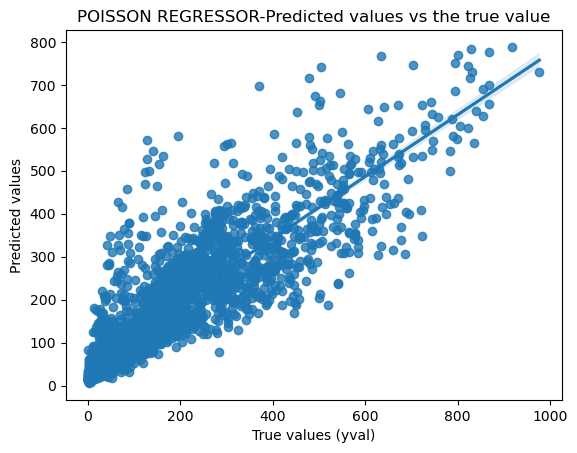

In [53]:
sns.regplot(x=y_val_new, y=ypred_p)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('POISSON REGRESSOR-Predicted values vs the true value');

In [54]:
print(f'The score of the Poisson Regression for the train data is {round((mp.score(Xtrain_new_tran, y_train_new)),4)}')

The score of the Poisson Regression for the train data is 0.7985


In [55]:
print(f'The score of the Poisson Regression for the val data is {round((mp.score(Xval_tran, y_val_new)),4)}')

The score of the Poisson Regression for the val data is 0.7832


In [56]:
print(f'The MSLE for the Poisson Regression model for the train data is {round((mean_squared_log_error(y_train_new, ypred_p_train, squared=False)),4)}')

The MSLE for the Poisson Regression model for the train data is 0.7599


In [57]:
print(f'The MSLE for the Poisson Regression model for the val data is {round((mean_squared_log_error(y_val_new, ypred_p, squared=False)),4)}')

The MSLE for the Poisson Regression model for the val data is 0.7928


### Random Forest

In [58]:
trans_rf = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['season', 'weather', 
                                                                      'year', 'day', 'month', 'day_of_week', 'week']),
    ('scaling_polynomial', scaling_and_poly, ['hour', 'humidity', 'temp', 'windspeed']),
    ("do-nothing", "passthrough", ['holiday', 'workingday']),
    #('standard', StandardScaler(), ['windspeed']),

])
trans_rf

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['season', 'weather', 'year', 'day', 'month',
                                  'day_of_week', 'week']),
                                ('scaling_polynomial',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['hour', 'humidity', 'temp', 'windspeed']),
                                ('do-nothing', 'passthrough',
                                 ['holiday', 'workingday'])])

In [59]:
Xtrain_fe_rf = Xtrain[['season', 'weather', 'hour', 'humidity','temp', 'year', 'month', 'day', 'workingday', 'holiday', 'day_of_week', 'week', 'windspeed']]
Xtrain_fe_rf

,season,weather,hour,humidity,temp,year,month,day,workingday,holiday,day_of_week,week,windspeed
2308,2,1,2,56,22.14,2011,June,Saturday,0,0,5,22,12.9980
3052,3,1,2,73,24.60,2011,July,Saturday,0,0,5,28,8.9981
1984,2,1,14,41,25.42,2011,May,Monday,1,0,0,19,15.0013
7483,2,1,4,50,17.22,2012,May,Friday,1,0,4,19,12.9980
4047,3,2,16,60,24.60,2011,September,Monday,1,0,0,38,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,4,2,5,65,12.30,2012,November,Friday,1,0,4,46,6.0032
6543,1,1,21,34,14.76,2012,March,Friday,1,0,4,10,22.0028
1418,2,2,23,47,26.24,2011,April,Monday,1,0,0,14,15.0013
3137,3,1,15,44,36.08,2011,July,Tuesday,1,0,1,29,12.9980


In [60]:
# fit the column transformer on the training data
trans_rf.fit(Xtrain_fe_rf)
# transform the training data
Xtrain_new_tran_rf = trans_rf.transform(Xtrain_fe_rf)
pd.DataFrame(Xtrain_new_tran_rf, columns=trans_rf.get_feature_names_out())

,onehot__season_1,onehot__season_2,onehot__season_3,onehot__season_4,onehot__weather_1,onehot__weather_2,onehot__weather_3,onehot__year_2011,onehot__year_2012,onehot__day_Friday,...,scaling_polynomial__hour temp,scaling_polynomial__hour windspeed,scaling_polynomial__humidity^2,scaling_polynomial__humidity temp,scaling_polynomial__humidity windspeed,scaling_polynomial__temp^2,scaling_polynomial__temp windspeed,scaling_polynomial__windspeed^2,do-nothing__holiday,do-nothing__workingday
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.048104,0.019830,0.3136,0.309787,0.127707,0.306021,0.126154,0.052006,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.053654,0.013728,0.5329,0.450426,0.115245,0.380715,0.097409,0.024923,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.388529,0.160206,0.1681,0.261702,0.107910,0.407424,0.167997,0.069272,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.074006,0.039660,0.2500,0.212766,0.114024,0.181077,0.097041,0.052006,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.429232,0.134273,0.3600,0.370213,0.115811,0.380715,0.119096,0.037256,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.064755,0.022897,0.4225,0.193617,0.068461,0.088728,0.031373,0.011093,0.0,1.0
8704,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.330250,0.352467,0.1156,0.122979,0.131252,0.130828,0.139630,0.149023,0.0,1.0
8705,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.659574,0.263195,0.2209,0.310000,0.123702,0.435038,0.173597,0.069272,0.0,1.0
8706,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.596670,0.148727,0.1936,0.402553,0.100341,0.837030,0.208639,0.052006,0.0,1.0


In [61]:
# transform the test data
Xval_tran_rf = trans_rf.transform(Xval)
pd.DataFrame(Xval_tran_rf, columns=trans_rf.get_feature_names_out())

,onehot__season_1,onehot__season_2,onehot__season_3,onehot__season_4,onehot__weather_1,onehot__weather_2,onehot__weather_3,onehot__year_2011,onehot__year_2012,onehot__day_Friday,...,scaling_polynomial__hour temp,scaling_polynomial__hour windspeed,scaling_polynomial__humidity^2,scaling_polynomial__humidity temp,scaling_polynomial__humidity windspeed,scaling_polynomial__temp^2,scaling_polynomial__temp windspeed,scaling_polynomial__windspeed^2,do-nothing__holiday,do-nothing__workingday
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.049954,0.116697,0.2500,0.063830,0.149112,0.016297,0.038071,0.088938,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.022202,0.025933,0.1681,0.104681,0.122272,0.065188,0.076143,0.088938,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.059204,0.039660,0.3721,0.207660,0.139109,0.115890,0.077633,0.052006,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.597595,0.246360,0.2304,0.347234,0.143148,0.523314,0.215737,0.088938,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.616096,0.260900,0.3844,0.488085,0.206691,0.619737,0.262442,0.111137,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.544866,0.188387,0.2500,0.329787,0.114024,0.435038,0.150414,0.052006,0.0,1.0
2174,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.071230,0.048047,0.7569,0.203617,0.137347,0.054776,0.036948,0.024923,0.0,0.0
2175,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.597595,0.116687,0.3844,0.501277,0.097879,0.653689,0.127640,0.024923,0.0,1.0
2176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.5929,0.360426,0.297247,0.219104,0.180697,0.149023,0.0,1.0


In [62]:
m_rf = RandomForestRegressor(n_estimators=1000,
                            max_depth=25,
                            random_state=0,
                            min_samples_split=1,
                            n_jobs=-1)
m_rf.fit(Xtrain_new_tran_rf, ytrain)


RandomForestRegressor(max_depth=25, min_samples_split=1, n_estimators=1000,
                      n_jobs=-1, random_state=0)

In [63]:
m_rf.feature_importances_

array([2.55438232e-02, 7.39880248e-04, 5.21865086e-04, 5.60926740e-03,
       1.65674375e-03, 6.40515829e-04, 1.07851213e-02, 4.45081837e-02,
       4.20146185e-02, 2.42497306e-03, 6.51080286e-04, 2.42638884e-03,
       1.45814983e-03, 4.81200760e-04, 4.50554144e-04, 5.83464844e-04,
       1.89117152e-03, 3.30524916e-04, 2.01020800e-04, 2.04672179e-04,
       7.07311742e-04, 8.29038245e-04, 3.25159779e-04, 6.84011076e-04,
       5.49221431e-04, 2.49757032e-04, 1.24606569e-03, 7.47443932e-04,
       6.79902991e-04, 4.49272793e-04, 5.90341491e-04, 4.68447818e-04,
       2.38708886e-03, 2.15900531e-03, 1.63795577e-03, 2.31933022e-04,
       7.00663383e-05, 5.18665954e-05, 1.58302382e-04, 8.24619099e-05,
       1.32984812e-04, 1.39953222e-04, 1.74847249e-04, 2.96710564e-04,
       7.32879195e-06, 1.16051899e-04, 2.21334722e-04, 6.52686529e-04,
       7.03443927e-04, 1.74815801e-05, 5.56034317e-04, 5.02645380e-04,
       3.84070544e-04, 9.60946327e-04, 1.75712647e-04, 2.00356846e-04,
      

In [64]:
y_pred_train_rf = m_rf.predict(Xtrain_new_tran_rf)
y_pred_train_rf

array([ 59.27      ,  66.683     , 169.62583342, ...,  65.04      ,
       153.2506    , 291.9338    ])

In [65]:
y_pred_val_rf = m_rf.predict(Xval_tran_rf)
y_pred_val_rf

array([116.3555    ,  44.889     ,   2.798     , ..., 791.86144639,
        31.955     , 197.94559332])

In [66]:
print(f'The score of the Random Forest for the train data is {round((m_rf.score(Xtrain_new_tran_rf, y_train_new)),4)}')

print(f'The score of the Random Forest for the val data is {round((m_rf.score(Xval_tran_rf, y_val_new)),4)}')

print(f'The MSLE for the Random Forest model for the train data is {round((mean_squared_log_error(y_train_new, y_pred_train_rf, squared=False)),4)}')

print(f'The MSLE for the Random Forest model for the val data is {round((mean_squared_log_error(y_val_new, y_pred_val_rf, squared=False)),4)}')

The score of the Random Forest for the train data is 0.992
The score of the Random Forest for the val data is 0.9485
The MSLE for the Random Forest model for the train data is 0.1569
The MSLE for the Random Forest model for the val data is 0.3307


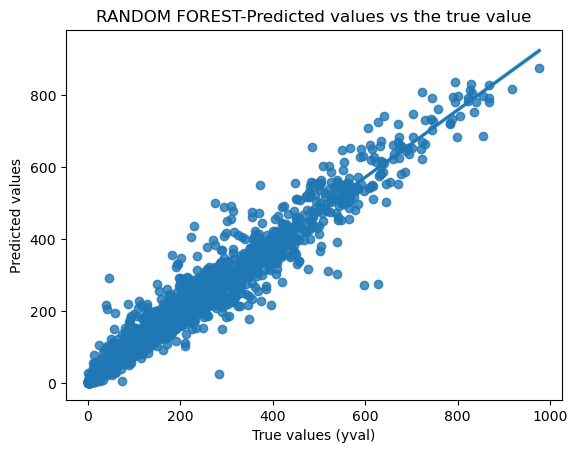

In [67]:
sns.regplot(x=y_val_new, y=y_pred_val_rf)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('RANDOM FOREST-Predicted values vs the true value');

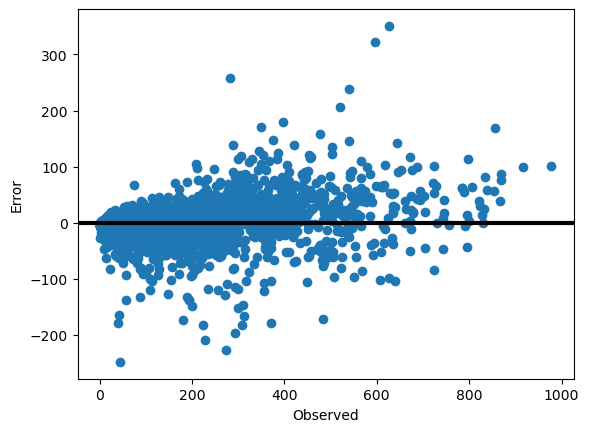

In [68]:
# plot the error difference
error = y_val_new - y_pred_val_rf
fig, ax = plt.subplots()
ax.scatter(y_val_new, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [81]:
final_prediction = pd.DataFrame(m_rf.predict(Xval_tran_rf))
final_prediction

,0
0,116.355500
1,44.889000
2,2.798000
3,539.457967
4,797.973543
...,...
2173,493.877000
2174,55.136000
2175,791.861446
2176,31.955000


### Test data

In [82]:
test = pd.read_csv("./data/test.csv")
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [84]:
def create_datetime(test):
    test['datetime'] = pd.to_datetime(df['datetime'])
    test['year'] = df['datetime'].dt.year
    test['month'] = df['datetime'].dt.month_name()
    test['day'] = df['datetime'].dt.day_name()
    test['hour'] = df['datetime'].dt.hour
    test['week'] = df['datetime'].dt.isocalendar().week
    test['day_of_week'] = df['datetime'].dt.weekday
create_datetime(test)

In [85]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week
0,2011-01-01 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,January,Saturday,0,52,5
1,2011-01-01 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Saturday,1,52,5
2,2011-01-01 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Saturday,2,52,5
3,2011-01-01 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Saturday,3,52,5
4,2011-01-01 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Saturday,4,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-03-07 14:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,March,Wednesday,14,10,2
6489,2012-03-07 15:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,March,Wednesday,15,10,2
6490,2012-03-07 16:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,March,Wednesday,16,10,2
6491,2012-03-07 17:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,March,Wednesday,17,10,2


In [86]:
#transform the test data
test_tran = trans_rf.transform(test)
pd.DataFrame(test_tran, columns=trans_rf.get_feature_names_out())

,onehot__season_1,onehot__season_2,onehot__season_3,onehot__season_4,onehot__weather_1,onehot__weather_2,onehot__weather_3,onehot__year_2011,onehot__year_2012,onehot__day_Friday,...,scaling_polynomial__hour temp,scaling_polynomial__hour windspeed,scaling_polynomial__humidity^2,scaling_polynomial__humidity temp,scaling_polynomial__humidity windspeed,scaling_polynomial__temp^2,scaling_polynomial__temp windspeed,scaling_polynomial__windspeed^2,do-nothing__holiday,do-nothing__workingday
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.3136,0.142979,0.255479,0.065188,0.116480,0.208130,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.011101,0.000000,0.3136,0.142979,0.000000,0.065188,0.000000,0.000000,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.022202,0.000000,0.3136,0.142979,0.000000,0.065188,0.000000,0.000000,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.033302,0.025176,0.3136,0.142979,0.108090,0.065188,0.049281,0.037256,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.044403,0.033568,0.3136,0.142979,0.108090,0.065188,0.049281,0.037256,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.155412,0.117489,0.3600,0.153191,0.115811,0.065188,0.049281,0.037256,0.0,1.0
6489,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.166512,0.125881,0.3600,0.153191,0.115811,0.065188,0.049281,0.037256,0.0,1.0
6490,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.177613,0.134273,0.3600,0.153191,0.115811,0.065188,0.049281,0.037256,0.0,1.0
6491,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.188714,0.116687,0.3136,0.142979,0.088407,0.065188,0.040307,0.024923,0.0,1.0


In [92]:
final_prediction_test = pd.DataFrame(m_rf.predict(test_tran))
final_prediction_test = final_prediction_test.rename(columns={0:'count'})

In [93]:
final_prediction_test ['datetime'] = test['datetime']
final_prediction_test

,count,datetime
0,10.204000,2011-01-01 00:00:00
1,4.257000,2011-01-01 01:00:00
2,2.975000,2011-01-01 02:00:00
3,2.818000,2011-01-01 03:00:00
4,2.344000,2011-01-01 04:00:00
...,...,...
6488,141.970833,2012-03-07 14:00:00
6489,143.633467,2012-03-07 15:00:00
6490,165.438676,2012-03-07 16:00:00
6491,187.353038,2012-03-07 17:00:00


In [96]:
final_prediction_test.set_index('datetime')

,count
datetime,
2011-01-01 00:00:00,10.204000
2011-01-01 01:00:00,4.257000
2011-01-01 02:00:00,2.975000
2011-01-01 03:00:00,2.818000
2011-01-01 04:00:00,2.344000
...,...
2012-03-07 14:00:00,141.970833
2012-03-07 15:00:00,143.633467
2012-03-07 16:00:00,165.438676


In [97]:
submission = final_prediction_test
submission.to_csv('submission1.csv', index=False)

## Regularization

In [69]:
alpha_m = 0.00005


In [70]:
m_ridge = Ridge(alpha=alpha_m, random_state=31)         # alpha 
m_lasso = Lasso(alpha=alpha_m, random_state=31)
m_elastic_net = ElasticNet(alpha=alpha_m, l1_ratio=.5,
                           random_state=31)

In [71]:
m_ridge.fit(Xtrain_new_tran, y_train_log)       # Train the linear model with ridge regularization
m_lasso.fit(Xtrain_new_tran, y_train_log)       # Train the linear model with lasso regularization
m_elastic_net.fit(Xtrain_new_tran, y_train_log) # Train the linear model with elsticnet regularization

ElasticNet(alpha=5e-05, random_state=31)

* Regularization for the train data

In [72]:
ypred_train_ridge_log = m_ridge.predict(Xtrain_new_tran)
ypred_train_lasso_log = m_lasso.predict(Xtrain_new_tran)
ypred_train_elastic_log = m_elastic_net.predict(Xtrain_new_tran)

In [73]:
ypred_train_ridge_unlog = np.exp(ypred_train_ridge_log)-1
ypred_train_lasso_unlog = np.exp(ypred_train_lasso_log)-1
ypred_train_elastic_unlog = np.exp(ypred_train_elastic_log)-1

In [74]:
m_linear_r2 = round((r2_score(y_train_new, ypred_train_unlog)),4)
m_linear_rmsle = round((mean_squared_log_error(y_train_new, ypred_train_unlog, squared = False)), 4)
print(f'The R2 for linear for the train data is {m_linear_r2}' + f'The MSLE for linear for the train data is {m_linear_rmsle}')

m_ridge_r2 = round((r2_score(y_train_new, ypred_train_ridge_unlog)),4)
m_ridge_rmsle = round((mean_squared_log_error(y_train_new, ypred_train_ridge_unlog, squared = False)), 4)
print(f'The R2 for RIDGE for the train data is {m_ridge_r2}' + f'The MSLE for RIDGE for the train data is {m_ridge_rmsle}')

m_lasso_r2 = round((r2_score(y_train_new, ypred_train_lasso_unlog)),4)
m_lasso_rmsle = round((mean_squared_log_error(y_train_new, ypred_train_lasso_unlog, squared = False)), 4)
print(f'The R2 for LASSO for the train data is {m_lasso_r2}' + f'The MSLE for LASSO for the train data is {m_lasso_rmsle}')


m_elastic_r2 = round((r2_score(y_train_new, ypred_train_elastic_unlog)),4)
m_elastic_rmsle = round((mean_squared_log_error(y_train_new, ypred_train_elastic_unlog, squared = False)), 4)
print(f'The R2 for ELASTIC for the train data is {m_elastic_r2}' + f'The MSLE for ELASTIC for the train data is {m_elastic_rmsle}')

The R2 for linear for the train data is 0.7381The MSLE for linear for the train data is 0.5661
The R2 for RIDGE for the train data is 0.7405The MSLE for RIDGE for the train data is 0.564
The R2 for LASSO for the train data is 0.7403The MSLE for LASSO for the train data is 0.5641
The R2 for ELASTIC for the train data is 0.7399The MSLE for ELASTIC for the train data is 0.5642


* Regularization for the val data

In [75]:
ypred_val_ridge_log = m_ridge.predict(Xval_tran)
ypred_val_lasso_log = m_lasso.predict(Xval_tran)
ypred_val_elastic_log = m_elastic_net.predict(Xval_tran)

In [76]:
ypred_val_ridge_unlog = np.expm1(ypred_val_ridge_log)
ypred_val_lasso_unlog = np.expm1(ypred_val_lasso_log)
ypred_val_elastic_unlog = np.expm1(ypred_val_elastic_log)

In [77]:
#m_linear_r2_val = round((r2_score(y_val_new, ypred_val_unlog)),4)
#m_linear_rmsle_val = round((mean_squared_log_error(y_val_new, ypred_val_unlog, squared = False)), 4)
#print(f'The R2 for linear for the val data is {m_linear_r2_val}' + f'The MSLE for linear for the val data is {m_linear_rmsle_val}')

m_ridge_r2_val = round((r2_score(y_val_new, ypred_val_ridge_unlog)),4)
m_ridge_rmsle_val = round((mean_squared_log_error(y_val_new, ypred_val_ridge_unlog, squared = False)), 4)
print(f'The R2 for RIDGE for the val data is {m_ridge_r2_val}' + f'The MSLE for RIDGE for the val data is {m_ridge_rmsle_val}')

m_lasso_r2_val = round((r2_score(y_val_new, ypred_val_lasso_unlog)),4)
m_lasso_rmsle_val = round((mean_squared_log_error(y_val_new, ypred_val_lasso_unlog, squared = False)), 4)
print(f'The R2 for LASSO for the val data is {m_lasso_r2_val}' + f'The MSLE for LASSO for the val data is {m_lasso_rmsle_val}')


m_elastic_r2_val = round((r2_score(y_val_new, ypred_val_elastic_unlog)),4)
m_elastic_rmsle_val = round((mean_squared_log_error(y_val_new, ypred_val_elastic_unlog, squared = False)), 4)
print(f'The R2 for ELASTIC for the val data is {m_elastic_r2_val}' + f'The MSLE for ELASTIC for the val data is {m_elastic_rmsle_val}')

The R2 for RIDGE for the val data is 0.7296The MSLE for RIDGE for the val data is 0.5914
The R2 for LASSO for the val data is 0.7296The MSLE for LASSO for the val data is 0.5912
The R2 for ELASTIC for the val data is 0.7294The MSLE for ELASTIC for the val data is 0.5914


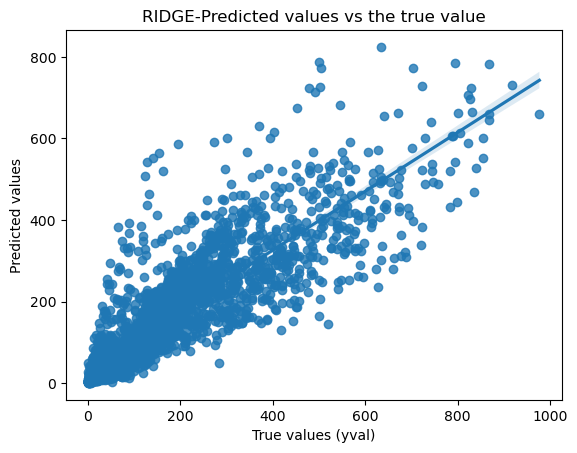

In [78]:
sns.regplot(x=y_val_new, y=ypred_val_ridge_unlog)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('RIDGE-Predicted values vs the true value');

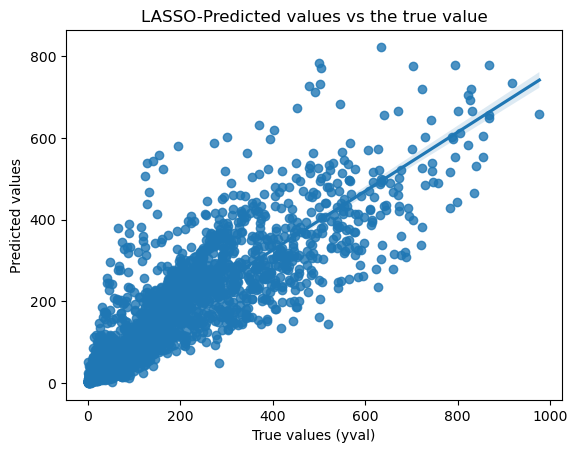

In [79]:
sns.regplot(x=y_val_new, y=ypred_val_lasso_unlog)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('LASSO-Predicted values vs the true value');

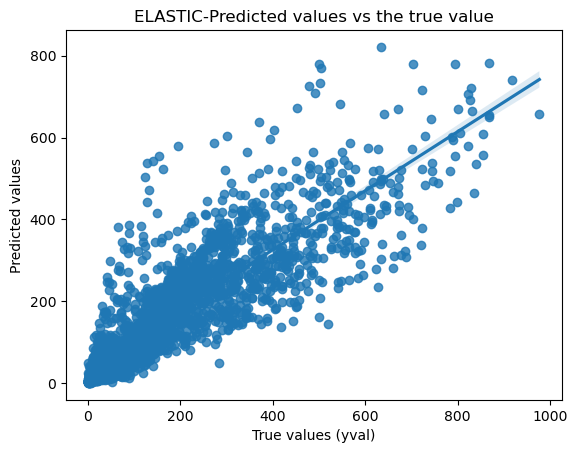

In [80]:
sns.regplot(x=y_val_new, y=ypred_val_elastic_unlog)
plt.xlabel('True values (yval)')
plt.ylabel('Predicted values')
plt.title('ELASTIC-Predicted values vs the true value');